In [1]:
from pickle import load
from numpy import mean
from numpy import std

In [2]:
results = load(open('results.pkl', 'rb'))
print('%d models evaluated' % len(results))
rearranged_results = {}
for model_name, scores in results.items():
    rearranged_results[model_name] = {}
    for metric_dict in scores:
        for metric, value in metric_dict.items():
            if metric not in rearranged_results[model_name]:
                rearranged_results[model_name][metric] = []
            rearranged_results[model_name][metric].append(value)
results = rearranged_results

4 models evaluated


In [3]:
results

{'Quadrant Discriminant Analysis': {'weighted_accuracy': [0.11124372477606063,
   0.111342159661384,
   0.1113189206482017,
   0.1106052589484564,
   0.11112204845516852],
  'weighted_f1_score': [0.11057117906510917,
   0.10856604910051786,
   0.10912125185935477,
   0.10873337730314903,
   0.10964139489606312],
  'confusion_matrix': [array([[134,   5,   9, ...,  29,   4,   3],
          [ 97, 168,  34, ..., 293,  17,   4],
          [  1,   5, 334, ...,  51,   1,   1],
          ...,
          [  2,   0,  16, ..., 369,   0,   0],
          [  0,   1,   1, ...,   2,   2,   9],
          [  0,   0,   0, ...,   2,   0,  10]]),
   array([[165,   6,   5, ...,  25,   1,   4],
          [129, 141,  37, ..., 321,   3,   5],
          [  3,   7, 334, ...,  54,   0,   0],
          ...,
          [  2,   0,  10, ..., 362,   0,   1],
          [  0,   0,   0, ...,   3,   1,   7],
          [  0,   0,   0, ...,   1,   1,  10]]),
   array([[151,  10,   4, ...,  28,   9,   5],
          [111, 148, 

In [4]:
metrics = ['weighted_accuracy', 'weighted_f1_score']
for model_name, scores in results.items():
    print(model_name)
    for metric in metrics:
        print(f"Mean {metric}: {mean(scores[metric], axis=0)*100:.1f}")
        print(f"Std {metric}: {std(scores[metric])*100:.1f}")

Quadrant Discriminant Analysis
Mean weighted_accuracy: 11.1
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 10.9
Std weighted_f1_score: 0.1
k_neighbors
Mean weighted_accuracy: 31.0
Std weighted_accuracy: 0.1
Mean weighted_f1_score: 29.7
Std weighted_f1_score: 0.1
naive_bayes
Mean weighted_accuracy: 5.3
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 2.5
Std weighted_f1_score: 0.0
logistic_regression
Mean weighted_accuracy: 22.7
Std weighted_accuracy: 0.2
Mean weighted_f1_score: 14.2
Std weighted_f1_score: 0.1


[[  23  135    0 ...    0    0    0]
 [  13 1267    2 ...    0    0    0]
 [   1   77   22 ...    0    0    0]
 ...
 [   0   62    0 ...   15    0    0]
 [   0    2    0 ...    0    0    0]
 [   0    2    0 ...    0    1    0]]


AttributeError: 'NoneType' object has no attribute 'shape'

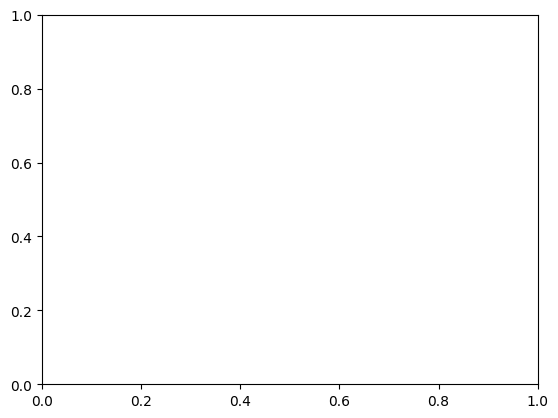

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(print(results["four_gram"]["confunsion_matrix"][0]))
disp.plot()
disp.show()